![](https://i.imgur.com/qkg2E2D.png)

# UnSupervised Learning Methods

## Exercise 001 - Part II

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 0.1.000 | 12/03/2023 | Royi Avital | First version                                                      |
|         |            |             |                                                                    |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/UnSupervisedLearningMethods/2023_03/Exercise0001Part002.ipynb)

In [29]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import time
# Machine Learning

# Miscellaneous
import os
import math
from platform import python_version
import random
import urllib.request

# Typing
from typing import Callable, List, Tuple, Union

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout
import warnings
warnings.filterwarnings('ignore')

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

In [2]:
# Configuration
%matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [3]:
# Constants

DATA_FILE_URL   = r'https://drive.google.com/uc?export=download&confirm=9iBg&id=1ZmoK4qFlXs142kLBJeHSKig7DOKEnLIX'
DATA_FILE_NAME  = r'ImgData.mat'


## Guidelines

 - Fill the full names of the team memebers in the `Team Members` section.
 - Answer all questions within the Jupyter Notebook.
 - Open questions are in part I of the exercise.
 - Coding based questions are in the subsequent notebooks.
 - Use MarkDown + MathJaX + Code to answer.
 - Submission in groups (Single submission per group).
 - You may and _should_ use the forums for question.
 - Good Luck!

## 4. Descent Methods

### Gradient Descent

Let $\boldsymbol{Y} \in \mathbb{R}^{d \times d}$ be a blurred version of the image $\boldsymbol{X} \in \mathbb{R}^{d \times d}$:

$$ \boldsymbol{Y} = \boldsymbol{H} \boldsymbol{X} \boldsymbol{H}^{T} $$

Where $\boldsymbol{H} \in\mathbb{R}^{d \times d}$ is a known separable blurring matrix.

The goal is to find $\boldsymbol{X}$ that minimizes:

$$\boldsymbol{X}^{\star} = \arg \min_{\boldsymbol{X}} f \left( \boldsymbol{X} \right) = \arg \min_{\boldsymbol{X}} {\left\| \boldsymbol{H} \boldsymbol{X} \boldsymbol{H}^{T} - \boldsymbol{Y} \right\|}_{F}^{2}$$

## Generate / Load Data

Load the data: $\boldsymbol{Y}$ and $\boldsymbol{H}$.

In [4]:
# Download Data
# This section downloads data from the given URL if needed.

if not os.path.exists(DATA_FILE_NAME):
    urllib.request.urlretrieve(DATA_FILE_URL, DATA_FILE_NAME)

In [5]:
dData = sp.io.loadmat(DATA_FILE_NAME)
mY    = dData['Y']
mH    = dData['H']

print(f'The image dimensions are: {mY.shape}')
print(f'The filter matrix dimensions are: {mH.shape}')

The image dimensions are: (256, 256)
The filter matrix dimensions are: (256, 256)


### Plot the Data

This sections illustrates the data.

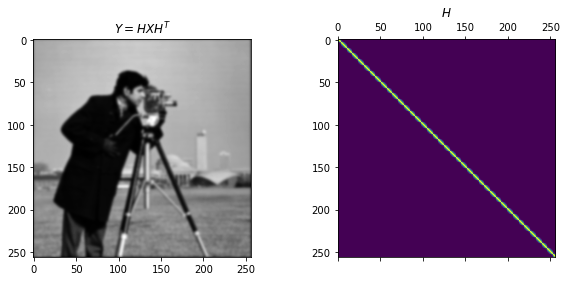

In [6]:
hF, hAs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
hAs = hAs.flat

hAs[0].imshow(mY, cmap = 'gray')
hAs[0].set_title('$Y = H X H^T$')
hAs[1].matshow(mH)
hAs[1].set_title('$H$')

plt.show()

### 4.1. Question

Find a closed form expression for $\boldsymbol{X}^{\star}$ as a function of $\boldsymbol{Y}$ and $\boldsymbol{H}$.


### 4.1. Solution


$\boldsymbol{X}^{\star} = \boldsymbol{H}^{-1}\boldsymbol{Y}\boldsymbol{H^T}^{-1}$

### 4.2. Task

Compute $\boldsymbol{X}^{\star}$ and plot it.

**Tip**: Avoid inverting the same matrix twice!

In [7]:
#===========================Fill This===========================#
# 1. Compute the optimal `mX` using the derivation.
# !! You may use `np.linalg.inv()` or better `np.linalg.solve()` or np.linalg.lstsq().
mX = np.linalg.solve(mH,mY@(np.linalg.inv(mH.T)))
#===============================================================#

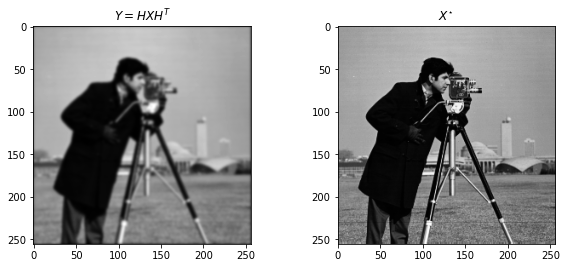

In [8]:
# Plot the Estimated Image

hF, hAs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
hAs = hAs.flat

hAs[0].imshow(mY, cmap = 'gray')
hAs[0].set_title('$Y = H X H^T$')
hAs[1].imshow(mX, cmap = 'gray')
hAs[1].set_title('$X^{\star}$')

plt.show()

## Iterative Solution

In practice, for many real world problems, the direct solution can not be computed due to the inversion of a matrix.  
In such cases, the model is given by a sparse matrix and the solution is calculated by using only _matrix vector operations_ (Also called _MatVec_, namely matrix vector multiplication).  

In this section we'll implement such method based on the Gradient Descent.

Given the function:

$$ f \left( \boldsymbol{X} \right) = {\left\| \boldsymbol{H} \boldsymbol{X} \boldsymbol{H}^{T} - \boldsymbol{Y} \right\|}_{F}^{2} $$

### 4.3. Task

Implement the following functions:

```python
#==================================================#
def ObjF(mX):
#==================================================#
def GradF(mX):
#==================================================#
def ApplyGradientDescent(objF, gradF, mX0, μ, numIter, ε):
#==================================================#
```



In [9]:
#===========================Fill This===========================#
# 1. Implement the objective function.
# !! You may use `np.linalg.norm()` or the element wise definition of the Frobenius norm (See `np.linalg.inner()`).
def ObjF(mX: np.ndarray) -> float:
    '''
    f(X) = ||HXH^T - Y||_F^2 is the objective function
    '''
    return np.linalg.norm(mH.dot(mX).dot(mH.T)-mY)**2
#===============================================================#

In [10]:
#===========================Fill This===========================#
# 1. Implement the gradient of the objective function.
def GradF(mX: np.ndarray) -> np.ndarray:
    '''
    Df(X) = ∇f(X) is the objective gradient
    '''
    H_T = mH.T
    Z = mH.dot(mX).dot(H_T)-mY
    return 2*H_T.dot(Z).dot(mH)
#===============================================================#

In [11]:
#===========================Fill This===========================#
# 1. Implement the gradient descent optimizer function.
def ApplyGradientDescent(objF: Callable, gradF: Callable, mX0: np.ndarray, μ: float, numIter: int, ε: float) -> Tuple[np.ndarray, List]:
    '''
    Apply gradient descent.
    Args:
        objF    - Objective function (Callable).
        gradF   - Objective gradient function (Callable).
        mX0     - Initial point (Array).
        μ       - Step size / Learning rate (Float).
        numIter - Maximum number of iterations (Integer).
        ε       - Stopping criterion value (Float).
    Output:
        mX      - The converged mX (Array).
        lF      - The value objective for each iteration (List).
    Stopping criterion:
        - Stop iterate when ||∇f(X)||_F < (numPixels * ε).
        - Stop iterate after `numIter` iterations.
    '''
    lF = []
    i=1
    numPixels = mX0.size
    while i <= numIter:
        lF.append(ObjF(mX0))
        D_F = GradF(mX0)
        mX0 = mX0 - μ*D_F
        i += 1
        if np.linalg.norm(D_F) < (numPixels*ε):
            break
    return mX0, lF
#===============================================================#

### 4.3. Task

 - Set a reasonable initial point for `mX0`.
 - Set the parameter `μ`.
 - Set the parameter `numIter`.
 - Set the parameter `ε`.

In [12]:
#===========================Fill This===========================#
mX0     = mY.copy()
μ       = 0.95
numIter = 3000
ε       = 1e-8
#===============================================================#

### 4.4. Task

In the following section we'll use the function `ApplyGradientDescent()` to estimate the image `mX`.  

 - Optimize the parameters above to get a comparable result as fast as you can.
 - Time the run time of the function and the number of iterations required.

In [47]:
#===========================Fill This===========================#
# 1. Estimate `mXIter` using `ApplyGradientDescent()`.
# 2. Time the run time and measure the number of iterations to converge.
# 3. Optimize the parameters to get a comparable result to `mX` from above.

import itertools
lrs = [1, 0.95, 0.9]
epsilons = [1e-6, 1e-7, 1e-8]
numIters = [1000, 3000, 5000]
results = {}

for lr, epsilon, numIter in itertools.product(*[lrs,epsilons,numIters]):
    start = time.time()
    mXIter, lF = ApplyGradientDescent(objF=ObjF, gradF=GradF, mX0=mY.copy(), μ=lr, numIter=numIter, ε=epsilon)
    end = time.time()
    run_time = end-start
    results[(lr, epsilon, numIter)] = (run_time,lF[-1],len(lF))

#===============================================================#

In [48]:
sorted_results= dict(sorted(results.items(), key=lambda item: item[1][0]))

In [49]:
data = list(zip(*sorted_results.values()))
labels = list(sorted_results.keys())

In [50]:
for label in labels[-9:]:
    sorted_results[label][2]

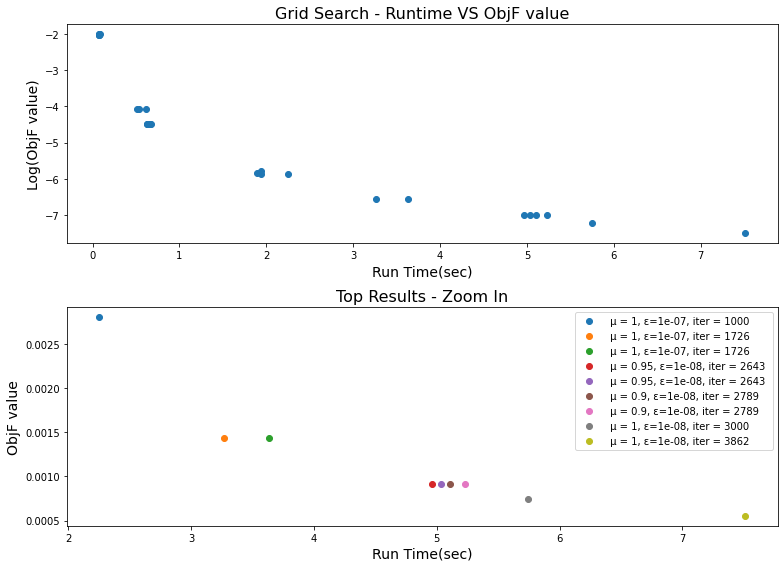

In [51]:
fig, axs = plt.subplots(2, 1, figsize=(11,8))
axs[0].scatter(data[0], np.log(data[1]))
axs[0].set_title("Grid Search - Runtime VS ObjF value", size=16)
axs[0].set_xlabel("Run Time(sec)", size=14)
axs[0].set_ylabel("Log(ObjF value)", size=14)
for label in labels[-9:]:
    axs[1].scatter(sorted_results[label][0], sorted_results[label][1], label=f' μ = {label[0]}, ε={label[1]}, iter = {sorted_results[label][2]} ', cmap="tab10")
axs[1].set_title( "Top Results - Zoom In", size=16)
axs[1].set_xlabel("Run Time(sec)", size=14)
axs[1].set_ylabel("ObjF value", size=14)
plt.legend()
plt.tight_layout()
plt.show()

Based on the results, taking into consideration runtime and the end Objective function value, the following hyperparameters were choosen:

$\mu=0.95,   \varepsilon = 1e^{-8}$, numiter = 3000

In [54]:
start_vanilla = time.time()
mXIter, lF = ApplyGradientDescent(objF=ObjF, gradF=GradF, mX0=mY.copy(), μ=0.95, numIter=3000, ε=1e-8)
end_vanilla = time.time()


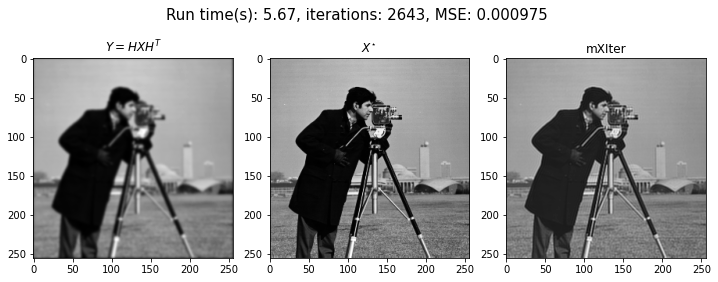

In [65]:
#===========================Fill This===========================#
# 1. Plot `mY`, `mX` and `mXIter`.
# 2. Calculate the MSE between `mX` and `mXIter`.
# 3. In the title of the plots show: The run time, the number of iterations and the MSE.
MSE_vanilla = ((mX-mXIter)**2).mean()
hF, hAs = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 4))
hAs = hAs.flat
hF.suptitle(f"Run time(s): {(end_vanilla - start_vanilla):.2f}, iterations: {len(lF)}, MSE: {MSE_vanilla:.6f}", size=15)
hAs[0].imshow(mY, cmap = 'gray')
hAs[0].set_title('$Y = H X H^T$')
hAs[1].imshow(mX, cmap = 'gray')
hAs[1].set_title('$X^{\star}$')
hAs[2].imshow(mXIter, cmap = 'gray')
hAs[2].set_title("mXIter")
plt.tight_layout()
plt.show()
#===============================================================#

## Acceleration Methods  

The convergence speed of the 1st derivative method is sometimes very slow (Depends on the condition number of the model).  
For small problems one might use a 2nd order methods, yet those are more sensitive and require more calculations per iteration.

[Yurii Nesterov](https://en.wikipedia.org/wiki/Yurii_Nesterov), a Russian mathematician, an internationally recognized expert in convex optimization, was a pioneer in developing some approaches to [acceleration of 1st order methods](https://en.wikipedia.org/wiki/Gradient_descent#Fast_gradient_methods).  

In this section we'll implement such method, yet based on the [_momentum_ approach](https://en.wikipedia.org/wiki/Gradient_descent#Momentum_or_heavy_ball_method).

![](https://i.imgur.com/hFQv6Sa.png)

Let's compare the update rule of both methods:

 - Vanilla Gradient Descent: $\boldsymbol{x}^{\left( k \right)} = \boldsymbol{x}^{\left( k - 1 \right)} - \mu \nabla f \left( \boldsymbol{x}^{\left( k - 1 \right)} \right)$.
 - Momentum Accelerated Gradient Descent: $\boldsymbol{x}^{\left( k \right)} = \boldsymbol{x}^{\left( k - 1 \right)} - \mu \nabla f \left( \boldsymbol{x}^{\left( k - 1 \right)} \right) + \beta \left( \boldsymbol{x}^{\left( k - 1 \right)} - \boldsymbol{x}^{\left( k - 2 \right)} \right) $.  
   Where $\beta \in \left[ 0, 1 \right)$ (Typically $\beta \in \left[ 0.9, 0.99 \right]$).

The momentum method basically incorporate more data in order to optimize the direction of descent.

### 4.5. Question

Show that $\boldsymbol{x}^{\left( k \right)}$ can be expressed by:

$$\boldsymbol{x}^{\left( k + 1 \right)} = \boldsymbol{x}^{\left( k \right)} - \mu \sum_{l = 0}^{k} \beta^{k - l} \nabla f \left( \boldsymbol{x}^{\left( l \right)} \right)$$

* <font color='brown'>(**#**)</font> Basically, the update step is a combination of all (Weighted) previous steps.

### 4.5. Solution

Prove by induction:

Base case, k=1:

$\boldsymbol{x}^{\left(1\right)}=\boldsymbol{x}^{\left(0\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(0\right)}\right)+\beta\left(\boldsymbol{x}^{\left(0\right)}-\boldsymbol{x}^{\left(-1\right)}\right)$ but $\boldsymbol{x}^{\left(0\right)}=\boldsymbol{x}^{\left(-1\right)}$ in the first step.

$\Rightarrow\boldsymbol{x}^{\left(1\right)}=\boldsymbol{x}^{\left(0\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(0\right)}\right)$

$\boldsymbol{x}^{\left(1\right)} = \boldsymbol{x}^{\left(0\right)}-\mu\sum_{l=0}^{k=0}\beta^{k-l}\nabla f\left(\boldsymbol{x}^{\left(l\right)}\right)=\boldsymbol{x}^{\left(0\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(0\right)}\right)$, thus base case holds.

Assuming that:

$\boldsymbol{x}^{\left(k\right)}=\boldsymbol{x}^{\left(k-1\right)}-\mu\sum_{l=0}^{k-1}\beta^{k-1-l}\nabla f\left(\boldsymbol{x}^{\left(l\right)}\right)$

Let's prove: 

$$\boldsymbol{x}^{\left(k+1\right)}=\boldsymbol{x}^{\left(k\right)}-\mu\sum_{l=0}^{k}\beta^{k-l}\nabla f\left(\boldsymbol{x}^{\left(l\right)}\right)$$

$\boldsymbol{x}^{\left(k+1\right)}=\boldsymbol{x}^{\left(k\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(k\right)}\right)+\beta\left(\boldsymbol{x}^{\left(k\right)}-\boldsymbol{x}^{\left(k-1\right)}\right)$

$=\boldsymbol{x}^{\left(k\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(k\right)}\right)+\beta\left(\boldsymbol{x}^{\left(k-1\right)}-\mu\sum_{l=0}^{k-1}\beta^{k-1-l}\nabla f\left(\boldsymbol{x}^{\left(l\right)}\right)-\boldsymbol{x}^{\left(k-1\right)}\right)$ - by the induction assumption.

$=\boldsymbol{x}^{\left(k\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(k\right)}\right)-\mu\sum_{l=0}^{k-1}\beta^{k-l}\nabla f\left(\boldsymbol{x}^{\left(l\right)}\right)$

But $-\mu\nabla f\left(\boldsymbol{x}^{\left(k\right)}\right)=-\mu\beta^{k-l}\nabla f\left(\boldsymbol{x}^{\left(l\right)}\right)$ where $k=l$, thus: 

$\boldsymbol{x}^{\left(k+1\right)}=\boldsymbol{x}^{\left(k\right)}-\mu\sum_{l=0}^{k}\beta^{k-l}\nabla f\left(\boldsymbol{x}^{\left(l\right)}\right)$

---

### 4.6. Task

Implement the following function:

```python
#====================================================#
def ApplyGradientDescentMomentum(objF, gradF, mX0, μ, β, numIter, ε):
#====================================================#
```

In [32]:
#===========================Fill This===========================#
# 1. Implement the momentum accelerated gradient descent optimizer function.
def ApplyGradientDescentMomentum(objF: Callable, gradF: Callable, mX0: np.ndarray, μ: float, β: float, numIter: int, ε: float) -> Tuple[np.ndarray, List]:
    '''
    Apply gradient descent.
    Args:
        objF    - Objective function (Callable)
        gradF   - Objective gradient function (Callable)
        mX0     - Initial point (Array)
        μ       - Step size / Learning rate (Float)
        numIter - Maximum number of iterations (Integer)
        β       - Momentum decaying factor (Float)
        ε       - Stopping criterion value (Float)
    Output:
        mX      - The converged mX (Array).
        lF      - The value objective for each iteration (List)
    Stopping criterion:
        - Stop iterate when ||∇f(X)||_F < (numPixels * ε).
        - Stop iterate after `numIter` iterations.
    '''
    lF = []
    X_1 = mX0
    X_2 = mX0
    i=0
    numPixels = mX0.size
    while i <= numIter-1:
        lF.append(ObjF(mX0))
        D_F = GradF(mX0)
        mX0 = mX0 -μ*D_F + β*(X_1 - X_2)
        i += 1
        X_2 = X_1
        X_1 = mX0
        if np.linalg.norm(D_F) < (numPixels*ε):
            break
    return mX0, lF
#===============================================================#

### 4.7. Task

Repeat the above for the accelerated method:

 - Set the the same initial `mX0` as above.
 - Set the parameters for the `ApplyGradientDescentMomentum()` function.
 - Run the function, optimize parameters to converge as fast as you can while achieving similar result to `mX`.
 - Plot `mY`, `mX`, `mXIter`, `mXMomentum`. Write the MSE between `mXIter` and `mXMomentum` to `mX`, Write the number of iterations for each and the run time.

In [56]:
#===========================Fill This===========================#
# 1. Estimate `mXIter` using `ApplyGradientDescentMomentum()`.
# 2. Time the run time and measure the number of iterations to converge.
# 3. Optimize the parameters to get a comparable result to `mX` from above.
lrs = [1, 0.97, 0.95, 0.9]
epsilons = [1e-6, 1e-7, 1e-8]
numIters = [1000, 2000, 3000]
betas = [0.9, 0.95, 0.99]
results_momentum = {}
for lr, epsilon, numIter, beta in itertools.product(*[lrs, epsilons, numIters, betas]):
    start = time.time()
    mXMomentum, lF_momentum = ApplyGradientDescentMomentum(objF=ObjF, gradF=GradF, mX0=mY.copy(), μ=lr, β=beta, numIter=numIter, ε=epsilon)
    end = time.time()
    run_time = end-start
    results_momentum[(lr, epsilon, numIter, beta)] = (run_time,lF_momentum[-1], len(lF_momentum))
#===============================================================#

In [57]:
sorted_results_momentum= dict(sorted(results_momentum.items(), key=lambda item: item[1][0]))

In [58]:
data_momentum = list(zip(*sorted_results_momentum.values()))
labels_momentum = list(sorted_results_momentum.keys())

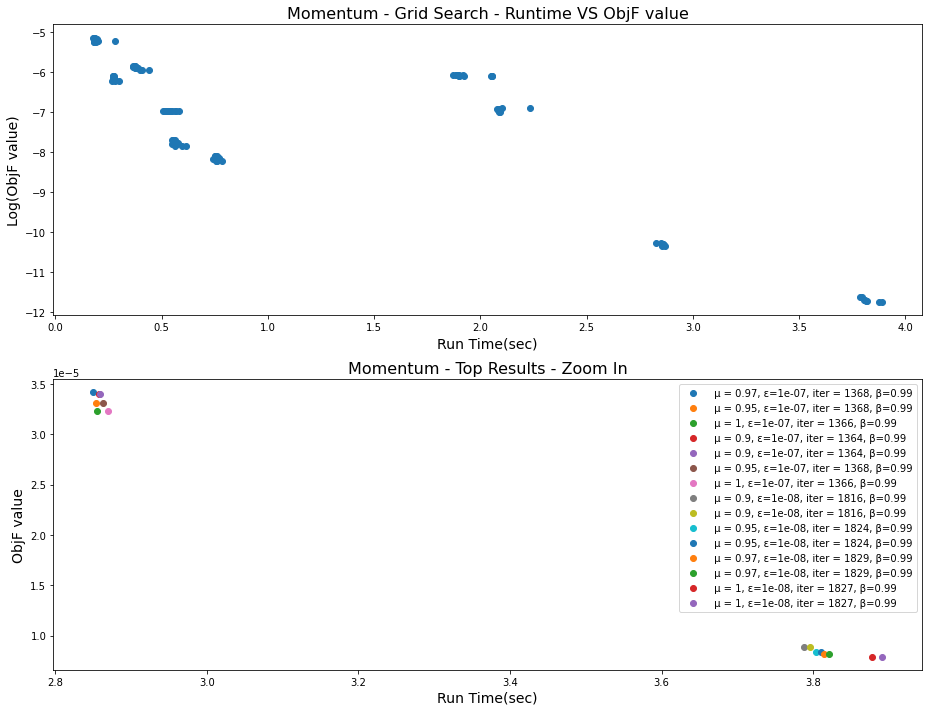

In [59]:
fig, axs = plt.subplots(2, 1, figsize=(13,10))
axs[0].scatter(data_momentum[0], np.log(data_momentum[1]))
axs[0].set_title("Momentum - Grid Search - Runtime VS ObjF value", size=16)
axs[0].set_xlabel("Run Time(sec)", size=14)
axs[0].set_ylabel("Log(ObjF value)", size=14)
for label in labels_momentum[-15:]:
    axs[1].scatter(sorted_results_momentum[label][0], sorted_results_momentum[label][1], label=f' μ = {label[0]}, ε={label[1]}, iter = {sorted_results_momentum[label][2]}, β={label[3]}', cmap="tab10")
axs[1].set_title( "Momentum - Top Results - Zoom In", size=16)
axs[1].set_xlabel("Run Time(sec)", size=14)
axs[1].set_ylabel("ObjF value", size=14)
plt.legend()
plt.tight_layout()
plt.show()

Based on the results, taking into consideration runtime and the end Objective function value, the following hyperparameters were choosen:

$\mu=0.9,   \varepsilon = 1e^{-8},  \beta=0.99$, numiter = 2000

In [60]:
start_momentum = time.time()
mXMomentum, lF_momentum = ApplyGradientDescentMomentum(objF=ObjF, gradF=GradF, mX0=mY.copy(), μ=0.9, β=0.99, numIter=2000, ε=1e-8)
end_momentum=time.time()

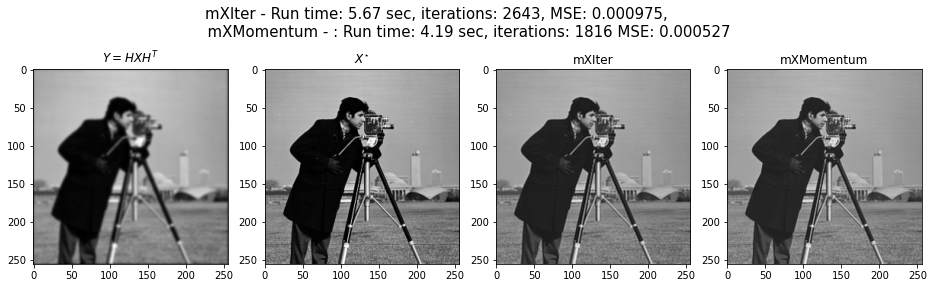

In [64]:
#===========================Fill This===========================#
# 1. Plot `mY`, `mX`, `mXIter` and `mXMomentum`.
# 2. Calculate the MSE between `mX` <-> `mXIter`, `mX` <-> `mXMomentum`.
# 3. In the title of the plots show: The run time, the number of iterations and the MSE (For `mXIter` and `mXMomentum`).
MSE_momentum = ((mX-mXMomentum)**2).mean()
hF, hAs = plt.subplots(nrows = 1, ncols = 4, figsize = (13, 4))
hAs = hAs.flat
plt.title("hAs")
hF.suptitle(f"mXIter - Run time: {(end_vanilla - start_vanilla):.2f} sec, iterations: {len(lF)}, MSE: {MSE_vanilla:.6f},\
            \n  mXMomentum - : Run time: {(end_momentum - start_momentum):.2f} sec, iterations: {len(lF_momentum)} MSE: {MSE_momentum:.6f}", size=15)

hAs[0].imshow(mY, cmap = 'gray')
hAs[0].set_title('$Y = H X H^T$')
hAs[1].imshow(mX, cmap = 'gray')
hAs[1].set_title('$X^{\star}$')
hAs[2].imshow(mXIter, cmap = 'gray')
hAs[2].set_title("mXIter")
hAs[3].imshow(mXMomentum, cmap = 'gray')
hAs[3].set_title("mXMomentum")
plt.tight_layout()
plt.show()
#===============================================================#

### 4.8. Task (Bonus 3%)

Plot the objective value function as a function of the iteration for both iterative methods.  

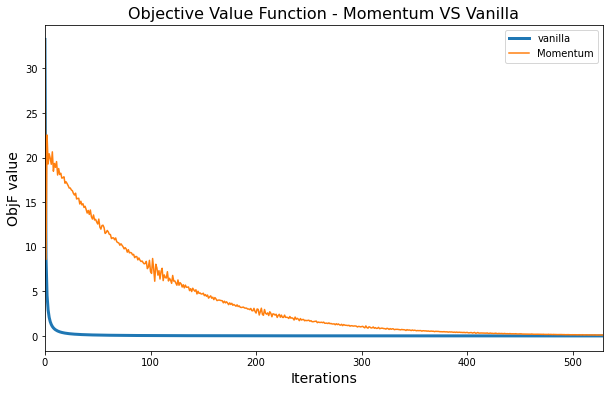

In [62]:
#===========================Fill This===========================#
fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(range(len(lF)), lF, label="vanilla", linewidth=3)
ax.plot(range(len(lF_momentum)), lF_momentum, label="Momentum")
# ax.set_ylim(ymin=0 ,ymax=lF[10])
ax.set_xlim(xmin=0, xmax=len(lF)/5)
ax.set_title("Objective Value Function - Momentum VS Vanilla", size=16)
ax.set_xlabel("Iterations", size=14)
ax.set_ylabel("ObjF value", size=14)
plt.legend();
#===============================================================#